Epoch: 1 | Loss: 0.936815392471968
Epoch: 2 | Loss: 0.6142065733383826
Epoch: 3 | Loss: 0.42975660346634986
Epoch: 4 | Loss: 0.30850681702675564
Epoch: 5 | Loss: 0.2393805407284682
Epoch: 6 | Loss: 0.18808085298383584
Epoch: 7 | Loss: 0.1690859127839906
Epoch: 8 | Loss: 0.14375564423033338
Epoch: 9 | Loss: 0.12260426389806467
Epoch: 10 | Loss: 0.11503199424319151
Epoch: 11 | Loss: 0.10118602347749665
Epoch: 12 | Loss: 0.09443946617404268
Epoch: 13 | Loss: 0.08406861843044451
Epoch: 14 | Loss: 0.08049254448996213
Epoch: 15 | Loss: 0.07691857731091982
Epoch: 16 | Loss: 0.07251467486375907
Epoch: 17 | Loss: 0.07597488946798463
Epoch: 18 | Loss: 0.07617381933020362
Epoch: 19 | Loss: 0.08948107657378823
Epoch: 20 | Loss: 0.07485398292598251
Epoch: 21 | Loss: 0.06631880512201882
Epoch: 22 | Loss: 0.06805284909644947
Epoch: 23 | Loss: 0.06545487544655398
Epoch: 24 | Loss: 0.06127483128221448
Epoch: 25 | Loss: 0.06834447974017896
Epoch: 26 | Loss: 0.06286101586369976
Epoch: 27 | Loss: 0.059446

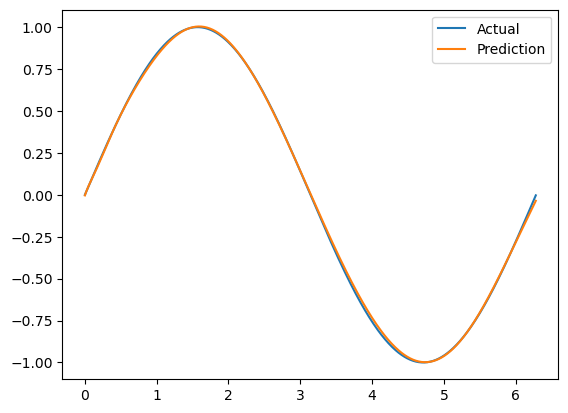

array('Flatten\nDense(1, 16)\nGeLU\nDense(16, 16)\nGeLU\nDense(16, 1)',
      dtype='<U57')

In [6]:
import matplotlib.pyplot as plt
import numpy as np

import numpytorch as torch
import numpytorch.nn as nn
import numpytorch.optim as optim
from numpytorch.utils.data import TensorDataset
from numpytorch.utils.data import mnist_reader


# Create a custom neural network class


class MyModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the layers of the neural network
        self.layers = [
            nn.Flatten(),
            nn.Linear(1, 16),
            nn.GeLU(),
            nn.Linear(16, 16),
            nn.GeLU(),
            nn.Linear(16, 1),
        ]


# Create an instance of the neural network class
model1 = MyModel()

# Load the training data
X_train = np.arange(0, 2 * np.pi, 0.01).reshape(-1, 1).astype(np.float64)
y_train = np.sin(X_train).astype(np.float64)

# Create a dataset object for the training data
train_data = TensorDataset(X_train, y_train, batch_size=32, shuffle=True)


# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model1.layers, lr=0.01)


# Training Loop
epochs = 500
for epoch in range(epochs):
    running_loss_train = 0

    # Iterate over the batches of the training data
    for i, (batch_X, batch_y) in enumerate(train_data):
        # Forward pass
        y_pred = model1.forward(batch_X)

        # Compute the loss
        loss = loss_fn.forward(y_pred=y_pred, y_true=batch_y).mean()

        # Backpropagate the loss
        grad = loss_fn.backward(y_pred=y_pred, y_true=batch_y)
        model1.backward(grad)

        # Update the parameters
        optimizer.step()

        # Accumulate the running loss
        running_loss_train += loss

    # Average the running loss
    running_loss_train /= len(train_data)

    #                  rint the epoch number and the loss
    print(f"Epoch: {epoch+1} | Loss: {running_loss_train}")


# Try plotting the results

train_pred = model1.forward(X_train)

# plt.scatter(X_train, train_pred)
plt.plot(X_train, y_train, label='Actual')
plt.plot(X_train, train_pred, label='Prediction')
plt.legend()
plt.show()


# Save the model weights
model1.save('sin-model-1')


# Load model
loaded_model = MyModel()  # Random weights
loaded_model.load('sin-model-1.npz')  # Loads saved weights into loaded_model

In [7]:
class MyModel2(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the layers of the neural network
        self.layers = [
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.GeLU(),
            nn.Linear(256, 32),
            nn.GeLU(),
            nn.Linear(32, 1),
        ]

X_train, y_train = mnist_reader.load_mnist('dataset', kind='train')
X_test, y_test = mnist_reader.load_mnist('dataset', kind='t10k')

# Create an instance of the neural network class
model2 = MyModel2()

print(X_train)
print(y_train)
# Create a dataset object for the training data
train_data = TensorDataset(X_train, y_train, batch_size=32, shuffle=True)

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model2.layers, lr=0.01)


# Training Loop
epochs = 500
for epoch in range(epochs):
    running_loss_train = 0

    # Iterate over the batches of the training data
    for i, (batch_X, batch_y) in enumerate(train_data):
        # Forward pass
        y_pred = model2.forward(batch_X)

        # Compute the loss
        loss = loss_fn.forward(y_pred=y_pred, y_true=batch_y).mean()

        # Backpropagate the loss
        grad = loss_fn.backward(y_pred=y_pred, y_true=batch_y)
        model2.backward(grad)

        # Update the parameters
        optimizer.step()

        # Accumulate the running loss
        running_loss_train += loss

    # Average the running loss
    running_loss_train /= len(train_data)

    #                  rint the epoch number and the loss
    print(f"Epoch: {epoch+1} | Loss: {running_loss_train}")

    # Try plotting the results

train_pred = model2.forward(X_train)

# plt.scatter(X_train, train_pred)
x_label = np.arange(0,len(X_train))
plt.plot(x_label, y_train, label='Actual')
plt.plot(x_label, train_pred, label='Prediction')
plt.legend()
plt.show()


# Save the model weights
model2.save('img-model-1')


# Load model
loaded_model = MyModel()  # Random weights
loaded_model.load('img-model-1.npz')  # Loads saved weights into loaded_model

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[9]
 [0]
 [0]
 ...
 [3]
 [0]
 [5]]


ValueError: shapes (32,784) and (1,16) not aligned: 784 (dim 1) != 1 (dim 0)